<h1 style="color:brown; text-align:center; background:lightblue; line-height:2">Indian Space Researh Centers Space Mission Analysis</h1>

<h2 style="color:brown; background:lightblue; line-height:1.5">About Dataset:</h2>
<h3 style="color:green; background:lightgreen; line-height:1.5">The "Indian Space Research Organization (ISRO) Spacecraft Missions - 2023" dataset provides an exhaustive record of spacecraft missions conducted by the Indian Space Research Organization (ISRO) during the year 2023. ISRO, known for its prowess in launching satellites to meet diverse customer requirements, has released a range of spacecraft/satellites as per the needs of its clientele. This dataset offers a comprehensive view of ISRO's contribution to space exploration and satellite deployment.</h3>

### Import basic required library and packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

### Load the dataset\

In [39]:
df=pd.read_csv('dataset/ISRO mission launches.csv', encoding='latin')
df.head()

,Mission Number,Mission Name,Launch Date,Launch Vehicle,Orbit Type,Motive,Status of Mission
0,125,Aditya-L1,2023-09-02,PSLV-C57/Aditya-L1 Mission,Lunar,Planetary Observation,Launch successful
1,124,Chandrayaan-3,2023-07-14,LVM3 M4 / Chandrayaan-3 Mission,Lunar,Planetary Observation,Launch successful
2,123,NVS-01,2023-05-29,GSLV-F12/NVS-01 Mission,NaN,Navigation,Launch successful
3,122,EOS-07,2023-02-10,SSLV-D2/EOS-07 Mission,NaN,Earth Observation,Launch successful
4,121,Thybolt,2022-11-26,PSLV-C54/EOS-06 Mission,NaN,Earth Observation,Launch successful


### Understanding the dataset

In [40]:
df.shape

(125, 7)

In [41]:
df.columns

Index(['Mission Number', 'Mission Name', 'Launch Date', 'Launch Vehicle',
       'Orbit Type', 'Motive', 'Status of Mission'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Mission Number     125 non-null    int64 
 1   Mission Name       125 non-null    object
 2   Launch Date        125 non-null    object
 3   Launch Vehicle     125 non-null    object
 4   Orbit Type         104 non-null    object
 5   Motive             121 non-null    object
 6   Status of Mission  125 non-null    object
dtypes: int64(1), object(6)
memory usage: 7.0+ KB


In [43]:
df.dtypes

Mission Number        int64
Mission Name         object
Launch Date          object
Launch Vehicle       object
Orbit Type           object
Motive               object
Status of Mission    object
dtype: object

### Duplicates rows

In [49]:
df.duplicated().sum()

0

#### No Duplicate rows.

### Missing values

In [44]:
df.isna().sum()

Mission Number        0
Mission Name          0
Launch Date           0
Launch Vehicle        0
Orbit Type           21
Motive                4
Status of Mission     0
dtype: int64

**Orbit type and Applications column contains missing rows.**

### Convert data type of launch date from object to datetime and extract year

In [50]:
df['Launch Date']=pd.to_datetime(df['Launch Date'])
df['Launch Year']=df['Launch Date'].dt.year

### In the column "Launch Vehicle" there is a mission name after "/" extract the Launch Vehicle only.

In [51]:
df['Launched Vehicle'] = [vehicle.split('/')[0] for vehicle in df['Launch Vehicle']]
df.drop("Launch Vehicle", axis=1, inplace=True)
df.head()

,Mission Number,Mission Name,Launch Date,Orbit Type,Motive,Status of Mission,Launch Year,Launched Vehicle
0,125,Aditya-L1,2023-09-02,Lunar,Planetary Observation,Launch successful,2023,PSLV-C57
1,124,Chandrayaan-3,2023-07-14,Lunar,Planetary Observation,Launch successful,2023,LVM3 M4
2,123,NVS-01,2023-05-29,NaN,Navigation,Launch successful,2023,GSLV-F12
3,122,EOS-07,2023-02-10,NaN,Earth Observation,Launch successful,2023,SSLV-D2
4,121,Thybolt,2022-11-26,NaN,Earth Observation,Launch successful,2022,PSLV-C54


## Exploratory Data Analysis

### 1. When India launched its first space mission?

In [52]:
df[df['Mission Number']==1]["Launch Date"].values[0]

numpy.datetime64('1975-04-19T00:00:00.000000000')

#### Indians first space mission is on 19 April 1975.

### 2. What is the name of indias first space mission?

In [47]:
df[df['Mission Number']==1]["Mission Name"].values[0]

'Aryabhata'

#### "Aryabhata" is the first space mission by ISRO.

### 3. What is the motive behind ISRO's first mission?

In [48]:
df[df['Mission Number']==1]["Motive"].values[0]

'Experimental'

#### First india mission to space was an experimental purpose.

### 4. Total space mission launched by ISRO?

In [53]:
len(df)

125

#### ISRO launched 125 space missions as on 15 september 2023.

### 5. Count the number of mission by ISRO for different orbit types?

In [59]:
orbit_type_df=df['Orbit Type'].value_counts().reset_index()
orbit_type_df

,Orbit Type,count
0,GSO (Geosynchronous Orbit),42
1,SSPO (Sun Synchronous Polar Orbit),37
2,LEO (Low Earth Orbit),8
3,GTO (Geosynchronous Transfer Orbit),6
4,GEO,6
5,Lunar,4
6,Martian,1


In [61]:
def add_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.text(i,y_list[i]/2,y_list[i], ha="center", fontsize=15, color='purple')

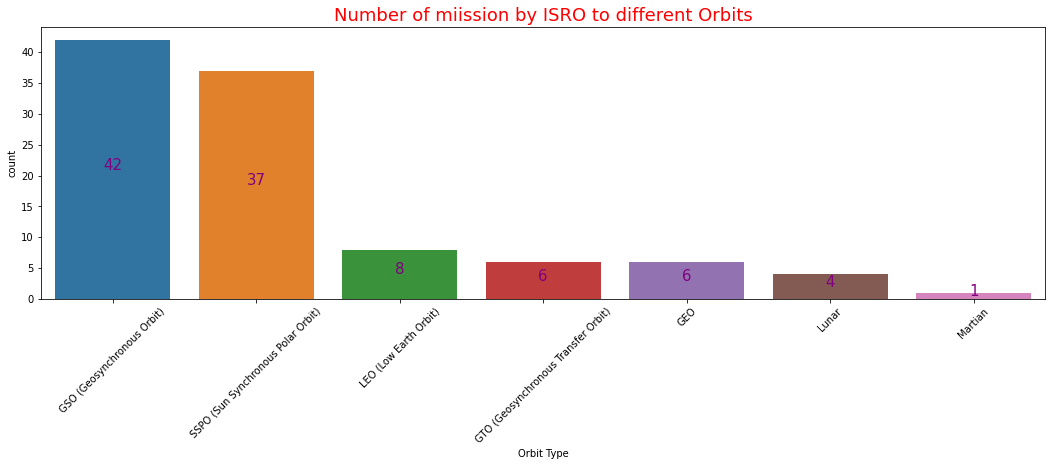

In [64]:
plt.figure(figsize=(18,5))
sns.barplot(x='Orbit Type', y='count', data=orbit_type_df)
plt.xticks(rotation=45)
plt.title("Number of miission by ISRO to different Orbits", fontsize=18, color='red')

add_label(orbit_type_df['Orbit Type'], orbit_type_df['count']);

#### Most of the mission are of GSO followed by SSPO.

### 6. What is the main reason of ISRO to send space craft ?

In [66]:
motive_df=df['Motive'].value_counts().reset_index()
motive_df

,Motive,count
0,Communication,38
1,Earth Observation,36
2,Experimental,11
3,Navigation,10
4,Planetary Observation,5
5,"Disaster Management System, Earth Observation",3
6,"Communication, Navigation",3
7,"Climate & Environment, Earth Observation",3
8,"Climate & Environment, Communication",3
9,"Earth Observation, Experimental",3


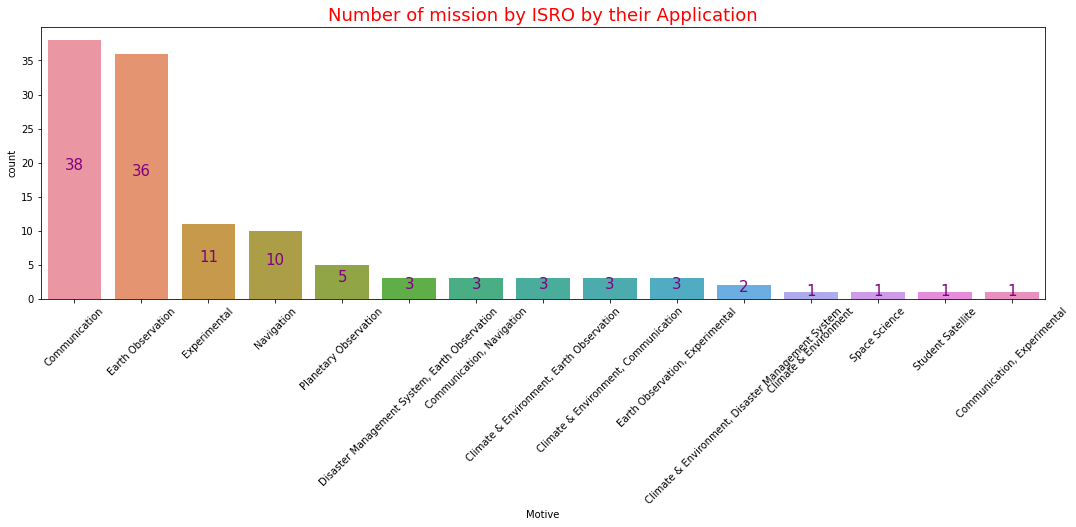

In [67]:
plt.figure(figsize=(18,5))
sns.barplot(x='Motive', y='count', data=motive_df)
plt.xticks(rotation=45)
plt.title("Number of mission by ISRO by their Application", fontsize=18, color='red')

add_label(motive_df['Motive'], motive_df['count']);

#### 38 ISRO mission are for communication purpose and 36 for earths observations.

### 7. What are the different types of vehicles carried by the space craft?

In [68]:
df['Launched Vehicle'].value_counts()

Launched Vehicle
PSLV-C54           5
PSLV-C37           3
PSLV-C40           3
PSLV-C7            2
C-1 Intercosmos    2
                  ..
PSLV-C34           1
GSLV-F05           1
PSLV-C35           1
Ariane-5 VA-231    1
C-1Intercosmos     1
Name: count, Length: 109, dtype: int64

#### There are total 109 different Vehicles launched with space crafts, "PSLV-C54" vehicle launched in 5 ISRO mission.

### 8. How many space mission are successful?

In [71]:
status_df=df['Status of Mission'].value_counts().reset_index()
status_df

,Status of Mission,count
0,Launch successful,112
1,Launch unsuccessful,9
2,Failed in Orbit,2
3,Decommisioned,1
4,Partial Failure in Orbit,1


In [73]:
px.pie(data_frame=status_df, values='count', names='Status of Mission', hole=0.4,
      title='Status of the mission launched by ISRO')

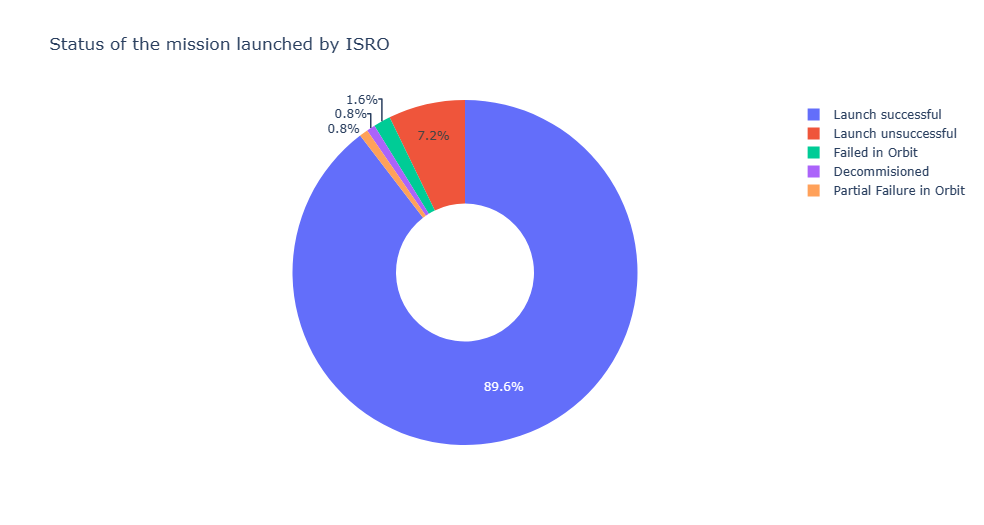

#### 89.6% ISRO space missions are successful. Only 7.2% are unsuccessful.

### 9. ISRO mission by Year?

In [75]:
year_df=df['Launch Year'].value_counts().reset_index()
year_df

,Launch Year,count
0,2022,9
1,2018,9
2,2017,8
3,2016,8
4,2019,7
5,2013,5
6,2011,5
7,2014,5
8,2023,4
9,2007,4


In [77]:
px.bar(data_frame=year_df, x='Launch Year', y='count', color='Launch Year', 
       title='Number of the mission launched by ISRO in each Year')

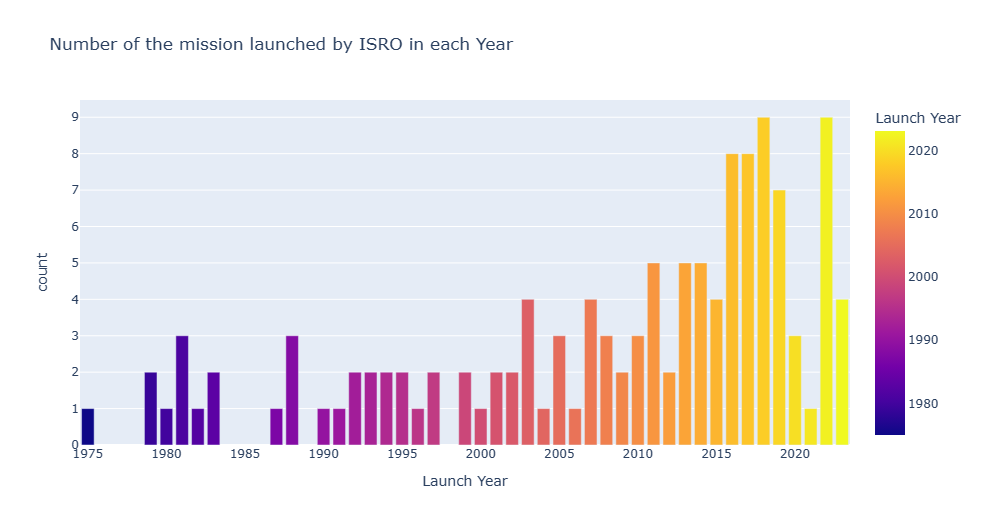

#### In the year 2018 and 2022 most space mission are launched.

### 10. Which orbit mission are unsuccessful?

In [87]:
df[df['Status of Mission']!='Launch successful']['Orbit Type'].value_counts().

Orbit Type
GSO (Geosynchronous Orbit)             7
GTO (Geosynchronous Transfer Orbit)    1
LEO (Low Earth Orbit)                  1
Name: count, dtype: int64

#### 7 missions are unsuccessful for GSO orbit.

### 11. Successfull mission for orbit type/

In [91]:
success_df=df[df['Status of Mission']=='Launch successful']['Orbit Type'].value_counts().reset_index()
success_df

,Orbit Type,count
0,SSPO (Sun Synchronous Polar Orbit),37
1,GSO (Geosynchronous Orbit),35
2,LEO (Low Earth Orbit),7
3,GEO,6
4,GTO (Geosynchronous Transfer Orbit),5
5,Lunar,4
6,Martian,1


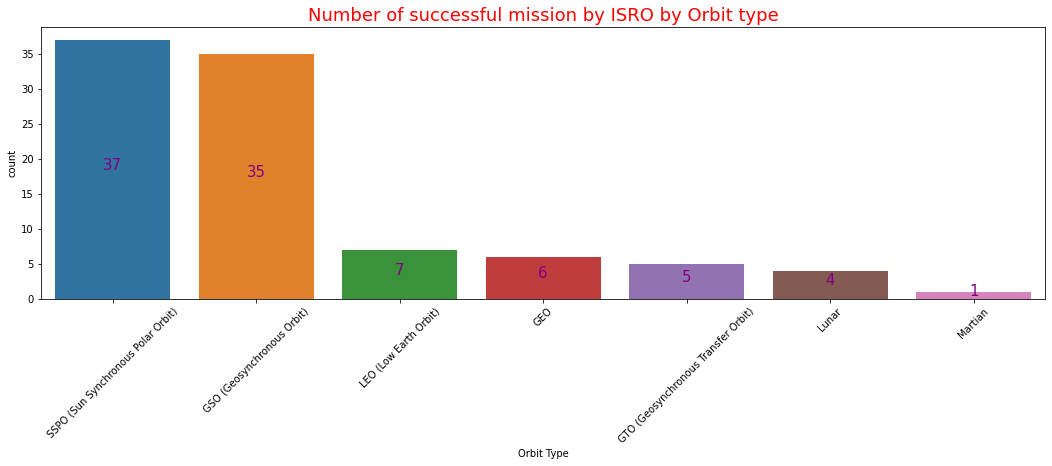

In [92]:
plt.figure(figsize=(18,5))
sns.barplot(x='Orbit Type', y='count', data=success_df)
plt.xticks(rotation=45)
plt.title("Number of successful mission by ISRO by Orbit type", fontsize=18, color='red')

add_label(success_df['Orbit Type'], success_df['count']);

#### For orbit type SSPO most of the missions are successful.